In [3]:
# Dataset
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb


In [4]:
(train_data, train_targets), _ = imdb.load_data(num_words = 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
def vectorize_sequences(sequences, dimension = 10000):

  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1.
  return results

train_data = vectorize_sequences(train_data)

In [6]:
# Original model

model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

history_original = model.fit(train_data, train_targets, epochs = 20, batch_size = 512, validation_split = .4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.6806 - loss: 0.6017 - val_accuracy: 0.8701 - val_loss: 0.4006
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8934 - loss: 0.3487 - val_accuracy: 0.8776 - val_loss: 0.3255
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9190 - loss: 0.2502 - val_accuracy: 0.8856 - val_loss: 0.2914
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9377 - loss: 0.1937 - val_accuracy: 0.8745 - val_loss: 0.3054
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9427 - loss: 0.1703 - val_accuracy: 0.8928 - val_loss: 0.2740
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9559 - loss: 0.1412 - val_accuracy: 0.8848 - val_loss: 0.2888
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9623 - loss: 0.1179 - val_accuracy: 0.8869 - val_loss: 0.2905
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9683 - loss: 0.1058 - val_accuracy: 0.8794 - v

In [8]:
# Model with dropout layers

model = keras.Sequential( [
    layers.Dense(16, activation = "relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation = "relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation = "sigmoid")

])

model.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

history_dropout =model.fit(train_data, train_targets, epochs = 20, batch_size = 512, validation_split = .4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5799 - loss: 0.6622 - val_accuracy: 0.8491 - val_loss: 0.4830
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7528 - loss: 0.5191 - val_accuracy: 0.8706 - val_loss: 0.3922
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8225 - loss: 0.4267 - val_accuracy: 0.8838 - val_loss: 0.3214
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8639 - loss: 0.3585 - val_accuracy: 0.8855 - val_loss: 0.2932
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8814 - loss: 0.3141 - val_accuracy: 0.8867 - val_loss: 0.2842
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9006 - loss: 0.2731 - val_accuracy: 0.8874 - val_loss: 0.2795
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9194 - loss: 0.2429 - val_accuracy: 0.8923 - val_loss: 0.2751
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9296 - loss: 0.2116 - val_accuracy: 0.8919 - v

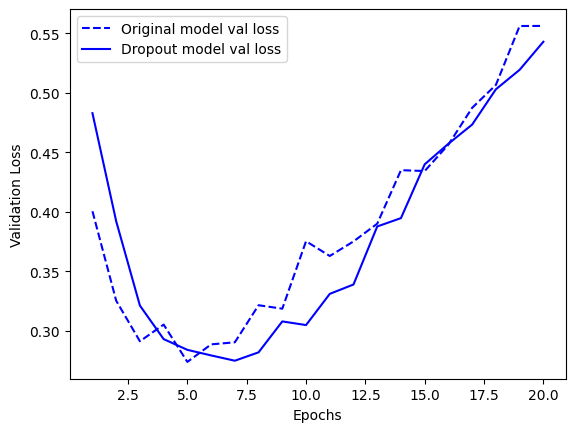

In [10]:
history_original_dict = history_original.history
history_original_val_loss = history_original_dict["val_loss"]

history_dropout_dict = history_dropout.history
history_dropout_val_loss = history_dropout_dict["val_loss"]

epochs = range(1, len(history_original_val_loss)+1)
plt.plot(epochs, history_original_val_loss, "b--", label = "Original model val loss")
plt.plot(epochs, history_dropout_val_loss, "b", label = "Dropout model val loss")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

In [ ]:
# Dropout model has lowest validation loss reached improved as compared to original model